In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg

import sys
sys.path.append("../modules")

from loop import *

In [2]:
path='C:/Users/Zucchi/Documents/Medidas/240621 - TN3 TN12 TP1 DN1 DN2 CB1/'

In [3]:
INO=Arduino('COM3')
HP=HP4155('GPIB0::17', debug=False)
HP.SetIntTime("MED")

HEWLETT-PACKARD,4155A,0,01.04:01.04:01.00


0

In [4]:
freq=1
count=1

HP.SetIntTime("MED")

for i in range(count):

    prog_bar=display('',display_id=True)
    
    while datetime.datetime.now().time().minute%freq:       
        prog_bar.update(datetime.datetime.now().strftime("%H:%M:%S"))
        sleep(1)
    clear_output(wait=True)
    
    start=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    print(i+1)
    printf(f"\nMeasurement: {start}", path)

    plt.close('all')

    HP.SetStop("OFF")

    INO.opench(1)
    printf(f"Chn{1} - TN3", path)
    pathp=path+'TN3'
    os.makedirs(pathp, exist_ok=True)
    
    HP.SetVgs(0, 1.5, 0.01, 0.025)
    LIN = PlotVgs(HP.SingleSave(f'{pathp}/IdVgs - {start}.csv', timeout=30))
    printf(f'Vth= {LIN} V', path)

    HP.SetVgs(0, 1.5, 0.01, 1.5)
    LIN = PlotVgs(HP.SingleSave(f'{pathp}/IdVgsSat - {start}.csv', timeout=30))
    printf(f'Vth= {LIN} V', path)

    HP.SetEx_Is(0.5, 0, -0.025, 0.7, 0.8, 0.05, 0.7)
    Is=CalcIs(HP.SingleSave(f'{pathp}/ExIs - {start}.csv', timeout=30), 300)
    printf(f'Is= {Is} V', path)
    
    HP.SetVp(Is, 0, LIN+0.3, 0.01)
    VTO=PlotVp(HP.SingleSave(f'{pathp}/VpVg - {start}.csv', timeout=30))
    printf(f'VTO= {VTO} V', path)

    HP.SetVds(0, 1.5, 0.01, 0.6, 1.2, 0.2)
    Plot(HP.SingleSave(f'{pathp}/IdVds - {start}.csv', timeout=30), 'Vd', 'Id')

    INO.opench(4)
    printf(f"Chn{4} - TN12", path)
    pathp=path+'TN12'
    os.makedirs(pathp, exist_ok=True)
    
    HP.SetVgs(0, 1.5, 0.01, 0.025)
    LIN = PlotVgs(HP.SingleSave(f'{pathp}/IdVgs - {start}.csv', timeout=30))
    printf(f'Vth= {LIN} V', path)

    HP.SetVgs(0, 1.5, 0.01, 1.5)
    LIN = PlotVgs(HP.SingleSave(f'{pathp}/IdVgsSat - {start}.csv', timeout=30))
    printf(f'Vth= {LIN} V', path)

    HP.SetEx_Is(0.5, 0, -0.025, 0.7, 0.8, 0.05, 0.7)
    Is=CalcIs(HP.SingleSave(f'{pathp}/ExIs - {start}.csv', timeout=30), 300)
    printf(f'Is= {Is} V', path)

    HP.SetVp(Is, 0, LIN+0.3, 0.01)
    VTO=PlotVp(HP.SingleSave(f'{pathp}/VpVg - {start}.csv', timeout=30))
    printf(f'VTO= {VTO} V', path)

    HP.SetVds(0, 1.5, 0.01, 0.6, 1.2, 0.2)
    Plot(HP.SingleSave(f'{pathp}/IdVds - {start}.csv', timeout=30), 'Vd', 'Id')

    HP.SetStop("COMP")

    INO.opench(2)
    printf(f"Chn{2} - DN2", path)
    pathp=path+'DN2'
    os.makedirs(pathp, exist_ok=True)

    HP.SingleDiode(-0.5, 1.5, 0.01, SMUN='SMU1', SMUP='SMU2', Comp=0.5e-3)
    Plot(HP.SingleSave(f'{pathp}/{start}.csv', timeout=30, real=True), 'Vf', 'If')

    INO.opench(3)
    printf(f"Chn{3} - DN1", path)
    pathp=path+'DN1'
    os.makedirs(pathp, exist_ok=True)

    HP.SingleDiode(-0.5, 1.5, 0.01, SMUN='SMU1', SMUP='SMU2', Comp=0.5e-3)
    Plot(HP.SingleSave(f'{pathp}/{start}.csv', timeout=30, real=True), 'Vf', 'If')
    
    HP.SetStop("OFF")

    INO.opench(6)
    printf(f"Chn{5} - CB1", path)
    pathp=path+'CB1'
    os.makedirs(pathp, exist_ok=True)

    HP.Set2P(-0.5e-3, 0.5e-3, 200, SMUN='SMU1', SMUP='SMU2', Comp=4)
    Rshort=Plot2P(HP.SingleSave(f'{pathp}/{start}.csv', timeout=30))

    printf(f"Rshort={format(Rshort, '.2f')}", path)

1

Measurement: 240703 144533
Open INO: ch1
Chn1 - TN3
Set IdxVgs
Vg=(0, 1.5, 0.01), Vd=0.025, Ilim=0.001
IdxVgs
Vth= 0.538 V
Set IdxVgs
Vg=(0, 1.5, 0.01), Vd=1.5, Ilim=0.001
IdxVgs
Vth= 1.506 V
Set Ex_Is
Vs=(0.5, 0, -0.025), Vg=(0.7, 0.8, 0.05), Vd=0.7
Ex_Is
Is= -7.673026918384909e-07 V
Set VpxVgs
Is=-7.673e-07, Vg=(0, 1.806, 0.01), Vlim=1.5
VpxVgs
VTO= 0.09 V
Set IdxVds
Vd=(0, 1.5, 0.01), Vg=(0.6, 1.2, 0.2), Ilim=0.001
IdxVds
30s 30s | 30s Open INO: ch4
Chn4 - TN12
Set IdxVgs
Vg=(0, 1.5, 0.01), Vd=0.025, Ilim=0.001
IdxVgs
Vth= 0.353 V
Set IdxVgs
Vg=(0, 1.5, 0.01), Vd=1.5, Ilim=0.001
IdxVgs
Vth= 1.616 V
Set Ex_Is
Vs=(0.5, 0, -0.025), Vg=(0.7, 0.8, 0.05), Vd=0.7
Ex_Is
Is= -3.946689401268468e-07 V
Set VpxVgs
Is=-3.947e-07, Vg=(0, 1.9160000000000001, 0.01), Vlim=1.5
VpxVgs
30s VTO= 0.33 V
Set IdxVds
Vd=(0, 1.5, 0.01), Vg=(0.6, 1.2, 0.2), Ilim=0.001
IdxVds
30s 30s | 30s Open INO: ch2
Chn2 - DN2
Set Diode
Vf=(-0.5, 1.5)
Diode
Open INO: ch3
Chn3 - DN1
Set Diode
Vf=(-0.5, 1.5)
Diode


KeyboardInterrupt: 

Open INO: ch1
Set VpxVgs
Is=-1.000e-05, Vg=(0, 0.6, 0.01), Vlim=1.5
VpxVgs


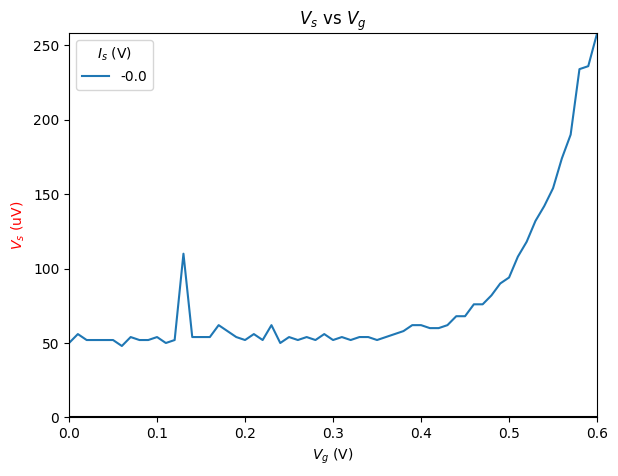

In [22]:
plt.close('all')

%matplotlib inline

INO.opench(1)
pathp=path+'TN3'
# HP.SetEx_Is(-0.1, 0.5, 0.025, 0.6, 0.7, 0.05, 0.6)
# Is=CalcIs(HP.SingleSave(f'{pathp}/ExIs - force.csv', timeout=30), 294)
HP.SetVp(-10e-6, 0, 0.6, 0.01)
VTO=PlotVp(HP.SingleSave(f'{pathp}/VpVg - force.csv', timeout=30))

In [ ]:
HP.close()
INO.opench(0)
INO.close() 